In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyarao63","key":"b8f64563d179f9883a02c3135cfc1ba8"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 38.8MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)

validation_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# normalize

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 109ms/step - loss: 1.2825 - accuracy: 0.6066 - val_loss: 0.8275 - val_accuracy: 0.5842
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5851 - accuracy: 0.7058 - val_loss: 0.5673 - val_accuracy: 0.7068
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5075 - accuracy: 0.7524 - val_loss: 0.5106 - val_accuracy: 0.7528
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4377 - accuracy: 0.7926 - val_loss: 0.4733 - val_accuracy: 0.7616
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3865 - accuracy: 0.8155 - val_loss: 0.6087 - val_accuracy: 0.7102
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3385 - accuracy: 0.8403 - val_loss: 0.4822 - val_accuracy: 0.7808
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2954 - accuracy: 0.8655 - val_loss: 0.5839 - val_ac

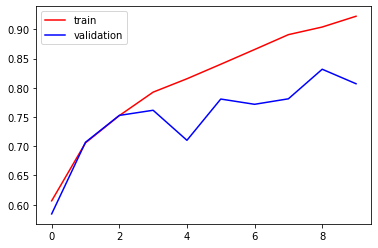

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

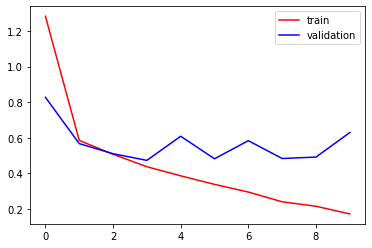

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [22]:
test_img = cv2.imread("/content/dog.png")

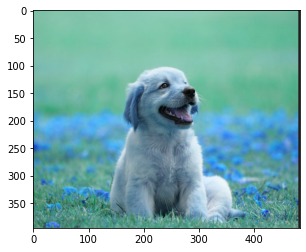

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(395, 484, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 495ms/step


array([[1.]], dtype=float32)